In [79]:
from luminol.anomaly_detector import AnomalyDetector
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
df = pd.read_csv('temp.csv')
df.head()

,Date,Temp,Unnamed: 2
0,1/1/1981,20.7,NaN
1,1/2/1981,17.9,NaN
2,1/3/1981,18.8,NaN
3,1/4/1981,14.6,NaN
4,1/5/1981,15.8,NaN


In [111]:
df = df.iloc[:80,:2]
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


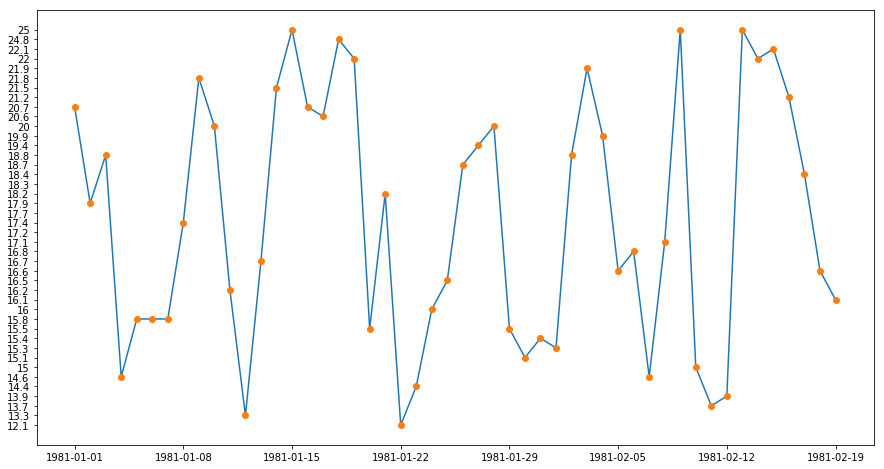

In [114]:
plt.figure(figsize = (15,8))
plt.plot(df['Date'], df ['Temp'])
plt.plot_date(df['Date'], df ['Temp'])

In [191]:
temp = df['Temp'].to_dict()

In [178]:
my_detector = AnomalyDetector(temp, algorithm_name= 'exp_avg_detector', algorithm_params = {'smoothing_factor' : 0, 'use_lag_window' : True, 'lag_window_size' : 2} )
score = my_detector.get_all_scores()
anom = {}
for timestamp, value in score.iteritems():
    if(value > 1):
        anom[timestamp] = value

In [188]:
anom

{3: 1.3758859060712985,
 8: 1.1597922303951282,
 11: 1.2570556583597041,
 13: 1.1580530458835046,
 14: 1.8398720025735595,
 17: 1.299034935633581,
 19: 1.225139063774519,
 21: 1.8123497121056975,
 33: 1.3485213386947532,
 39: 2.0726751735273776,
 41: 1.1006007353884308,
 44: 1.3541725520493861,
 45: 1.1094360292357024}

In [189]:
anomalies = df.iloc[list(anom.keys())]
anomalies

,Date,Temp
3,1981-01-04,14.6
8,1981-01-09,21.8
11,1981-01-12,13.3
13,1981-01-14,21.5
14,1981-01-15,25
17,1981-01-18,24.8
19,1981-01-20,15.5
21,1981-01-22,12.1
33,1981-02-03,21.9
39,1981-02-09,25


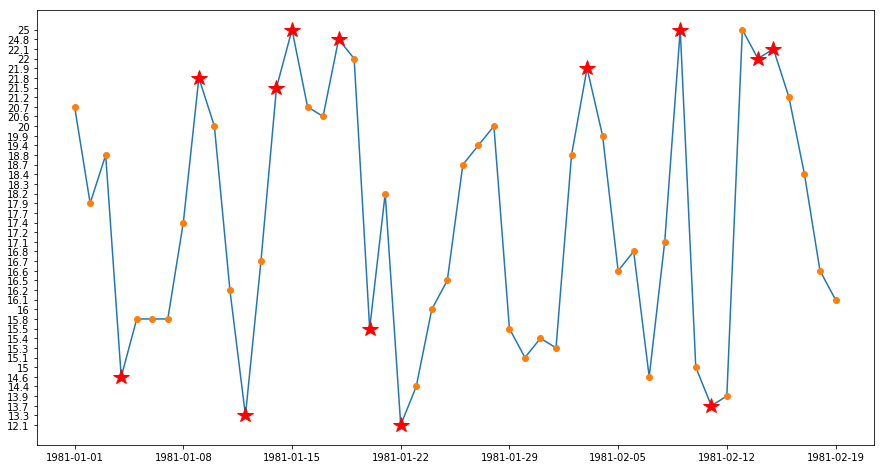

In [190]:
plt.figure(figsize = (15,8))
plt.plot(df['Date'], df ['Temp'])
plt.plot_date(df['Date'], df ['Temp'])
plt.plot_date(anomalies['Date'], anomalies ['Temp'], 'r*', markersize = 16)